<a href="https://colab.research.google.com/github/F-dat/DataAnalysisPython/blob/master/CommAthens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install Twython

In [ ]:
from google.colab import drive
drive.mount('/gdrive')



PATH = "/gdrive/My\ Drive/Colab\ Notebooks/"
!ls {PATH}

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
'03- pandas (billionaires).ipynb'
'03 - pandas intro (animals dataset).ipynb'
'2 TwitterFani Ventouri.ipynb'
 athcountries.ipynb
 bank.csv
 banknote.csv
'Beer cans-FaniVentouri.ipynb'
 Bike-Sharing-Dataset
 bluepalace.csv
 cancer.csv
 Chaniacountriesipynb.ipynb
 Classwork6.ipynb
 Classwork8.ipynb
 CommAthens.ipynb
'Copy of Athens2019airport.ipynb'
'Copy of Billionaires_Classwork.ipynb'
'Copy of ClassificationLR_DT_RF.ipynb'
'Copy of Classwork_7.ipynb'
'Copy of  Classwork_9.ipynb'
'Copy of Homework-1-part1-Ventouri'
'Copy of Homework2.VentouriFani.ipynb'
'Copy of Homework3_Marriages_Deaths_Greece.ipynb'
'Copy of homework-4-notebook1.sotirakou-checkpoint.ipynb'
'Copy of homework-4-notebook1.sotirakou.ipynb'
'Copy of Homework7 - Beers.ipynb'
'Copy of MachineLearningDecisionTreesNaive BayesClassifiersFeatureImportance (1).ipynb'
'Copy of MachineLearningDecisionTreesNaive Bayes

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("/gdrive/My Drive/Colab Notebooks/δεδ/Καθαρα/athcomm.csv")

In [ ]:
df = pd.DataFrame(df)
df.columns

Index(['title', 'comment', 'date'], dtype='object')

In [ ]:
df.head()

,title,comment,date
0,Υπεροχο,"Είναι υπέροχο με παρα πολλα εκθεματα,σε ωραία τοποθεσία,εντυπωσιακό,κοντά στην Ακρόπολη!αξίζει να πατε",Ημερομηνία εμπειρίας: Ιούνιος 2020
1,Αξίζει!,"Εξυπηρέτηση/Service: 4/5 Αναμονή/Stand-by: 5' Ατμόσφαιρα/Vibe: 4/5 Τιμή/Price: $-$$ (φθηνό για φοιτητές και μικρά παιδιά, ιδανικές τιμές για σχολεία και γκρουπς)",Ημερομηνία εμπειρίας: Ιούλιος 2019
2,Ένα από τα ωραιότερα μούσια του κόσμου.,Δεν υπάρχει χρονομηχανη... Αλλά πραγματικά το συγκεκριμένο μουσείο σε ταξιδεύει στις ενδοξοτερες στιγμές του Ελληνισμού και του κόσμου ολόκληρου. . Από άκρη σ άκρη πλημμυρίζει η ψυχή σου με δέος και θαυμασμό...στενοχωριέσαι όταν δεις την περιοχή των Καρυάτιδων λειψή.... ελπίζω,Ημερομηνία εμπειρίας: Νοέμβριος 2019
3,Από τα καλύτερα,"Ένα εξαιρετικό μουσείο, το καλύτερο της Αθήνας, ίσως το καλύτερο και όλης της χώρας. Πανέμορφο, τεράστιο, γεμάτο όμορφα εκθέματα που τονίζουν την πλούσια ιστορία της Ελλάδας. Εξυπηρετικό προσωπικό, σχετικές επιγραφές διαθέσιμες σε πολλές γλώσσες και γενικότερα κανένα παράπονο.",Ημερομηνία εμπειρίας: Μάιος 2019
4,Υπέροχο Μουσείο Ακρόπολης!,"Το Μουσείο της Ακρόπολης είναι ένα κόσμημα αρχιτεκτονικής και είναι γεμάτο θησαυρούς της αρχαιότητας. Μοναδικά εκθέματα που σε καθηλώνουν, πανέμορφη τοποθεσία, απέναντι από το βράχο της Ακρόπολης και ιδανικό σημείο προσβάσιμο με μετρό.",Ημερομηνία εμπειρίας: Δεκέμβριος 2019


In [ ]:
df.isnull()

,title,comment,date
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
180,False,False,False
181,False,False,False
182,False,False,False
183,False,False,False


In [ ]:
missing_values = ["n/a", "na", "--", 999,9999, "NA", "NaN", "nan"]
df.replace(to_replace = missing_values, value = np.nan, inplace = True) 
df.dropna(inplace=True) 
df.reset_index(drop=True, inplace=True)  

In [ ]:
df.isnull().sum()

title      0
comment    0
date       0
dtype: int64

In [ ]:
import datetime as datetime

In [ ]:
df['date'] = df['date'].str.replace('Ημερομηνία εμπειρίας:', '') 

In [ ]:
df['date'].head()

0        Ιούνιος 2020
1        Ιούλιος 2019
2      Νοέμβριος 2019
3          Μάιος 2019
4     Δεκέμβριος 2019
Name: date, dtype: object

In [ ]:
df['date'] = df['date'].str.replace('Ιούνιος', 'June') 
df['date'] = df['date'].str.replace('Ιανουάριος', 'January')
df['date'] = df['date'].str.replace('Φεβρουάριος', 'February')
df['date'] = df['date'].str.replace('Μάρτιος', 'March')
df['date'] = df['date'].str.replace('Απρίλιος', 'April')
df['date'] = df['date'].str.replace('Μάιος', 'May')
df['date'] = df['date'].str.replace('Ιούλιος', 'July')
df['date'] = df['date'].str.replace('Αύγουστος', 'August')
df['date'] = df['date'].str.replace('Σεπτέμβριος', 'September')
df['date'] = df['date'].str.replace('Οκτώβριος', 'October')
df['date'] = df['date'].str.replace('Νοέμβριος', 'November')
df['date'] = df['date'].str.replace('Δεκέμβριος', 'December')           

In [ ]:
df['date'].head()

0         June 2020
1         July 2019
2     November 2019
3          May 2019
4     December 2019
Name: date, dtype: object

In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df['date'].head()

0   2020-06-01
1   2019-07-01
2   2019-11-01
3   2019-05-01
4   2019-12-01
Name: date, dtype: datetime64[ns]

In [ ]:
df.dtypes

title              object
comment            object
date       datetime64[ns]
dtype: object

In [ ]:
!python -m spacy download el_core_news_md

✔ Download and installation successful
You can now load the model via spacy.load('el_core_news_md')


In [ ]:
import spacy
from spacy import displacy
import pandas as pd
from collections import defaultdict
import operator

In [ ]:
indexes = {}
emolex_df = pd.read_csv('https://raw.githubusercontent.com/cmourlas/DataAnalysisPython/master/lexicons/greek_sentiment_lexicon.tsv',sep='\t')
emolex_df = emolex_df.fillna('N/A')

In [ ]:
emolex_df

,Term,POS1,POS2,POS3,POS4,Subjectivity1,Subjectivity2,Subjectivity3,Subjectivity4,Polarity1,Polarity2,Polarity3,Polarity4,Anger1,Anger2,Anger3,Anger4,Disgust1,Disgust2,Disgust3,Disgust4,Fear1,Fear2,Fear3,Fear4,Happiness1,Happiness2,Happiness3,Happiness4,Sadness1,Sadness2,Sadness3,Sadness4,Surprise1,Surprise2,Surprise3,Surprise4,Aditional1,Aditional2,Aditional3,Aditional4,Comments1,Comments2,Comments3,Comments4,Unnamed: 45
0,αβάφτιστος,ADJ,ADJ,ADJ,ADJ,SUBJ-,OBJ,SUBJ-,OBJ,BOTH,N/A,BOTH,N/A,3,N/A,5,N/A,4,N/A,5,N/A,1,N/A,1,N/A,1,N/A,1,N/A,4,N/A,1,N/A,4,N/A,5,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A
1,Χριστός,NOUN,NOUN,NOUN,N/A,SUBJ+,SUBJ-,SUBJ+,SUBJ-,BOTH,BOTH,BOTH,NEG,5,5,5,3,4,5,5,1,5,5,5,2,5,5,5,1,5,5,5,1,5,5,5,3,N/A,N/A,N/A,χριστοπαναγία,N/A,"in opinionated contexts it only has a negative polarity. In other contexts, can be used having a positive polarity (e.g. as a wish). Suggest not to be used, as it's highly ambiguous. Further research should be done concerning its context",N/A,N/A,N/A
2,α,INTJ,INTJ,INTJ,INTJ,SUBJ+,SUBJ+,SUBJ+,SUBJ-,BOTH,BOTH,BOTH,BOTH,4,5,5,1,5,5,5,1,5,5,5,1,5,5,5,1,4,5,5,1,5,5,5,4,N/A,N/A,N/A,N/A,N/A,"not to be used, higly ambiguous. (letter repetition is usual (e.g. aaa) in order to emphasize)",N/A,N/A,N/A
3,αβάπτιστος,ADJ,ADJ,ADJ,ADJ,SUBJ-,OBJ,SUBJ-,OBJ,BOTH,N/A,BOTH,N/A,3,N/A,5,N/A,4,N/A,5,N/A,1,N/A,1,N/A,1,N/A,1,N/A,4,N/A,1,N/A,4,N/A,5,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A
4,αβεβαιότητα,NOUN,NOUN,NOUN,NOUN,OBJ,SUBJ+,OBJ,SUBJ-,N/A,NEG,N/A,NEG,N/A,1,N/A,1,N/A,1,N/A,1,N/A,1,N/A,4,N/A,1,N/A,1,N/A,1,N/A,2,N/A,1,N/A,1,N/A,N/A,N/A,αβέβαιος,N/A,sentiment: uncertainty. Not included,N/A,N/A,N/A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2310,ωραίος -α -ο,ADJ,ADJ,ADJ,ADJ,N/A,SUBJ+,SUBJ+,SUBJ+,N/A,POS,POS,POS,N/A,1,1,1,N/A,1,1,1,N/A,1,1,1,N/A,3,4,3,N/A,1,1,1,N/A,1,5,1,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A
2311,ωρύομαι,VERB,VERB,VERB,VERB,SUBJ+,SUBJ+,SUBJ+,SUBJ+,NEG,NEG,NEG,NEG,5,5,4,5,4,1,1,3,2,1,1,1,1,1,1,1,1,1,1,2,1,1,4,3,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A
2312,ωσάν,ADP,ADP,ADP,CONJ,OBJ,OBJ,SUBJ-,OBJ,N/A,N/A,NEG,N/A,N/A,N/A,1,N/A,N/A,N/A,1,N/A,N/A,N/A,1,N/A,N/A,N/A,1,N/A,N/A,N/A,1,N/A,N/A,N/A,1,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A
2313,ωτακουστής,NOUN,NOUN,NOUN,NOUN,SUBJ-,OBJ,SUBJ+,OBJ,NEG,N/A,NEG,N/A,2,N/A,2,N/A,3,N/A,3,N/A,1,N/A,1,N/A,1,N/A,1,N/A,1,N/A,1,N/A,2,N/A,1,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A


In [ ]:
for index, row in emolex_df.iterrows():
    df.at[index, "Term"] = row["Term"].split(' ')[0]
    indexes[emolex_df.at[index, "Term"]] = index

In [ ]:
df['comment'] = df['comment'].str.lower()

In [ ]:
df['title'] = df['title'].str.lower()

In [ ]:
text = 'df'

In [ ]:
subj_scores = {
    'OBJ': 0,
    'SUBJ-': 0.5,
    'SUBJ+': 1,
}

emotion_scores = {
    'N/A': 0,
    '1.0': 0.2,
    '2.0': 0.4,
    '3.0': 0.6,
    '4.0': 0.8,
    '5.0': 1,
}

polarity_scores = {
    'N/A': 0,
    'BOTH': 0,
    'NEG': -1,
    'POS': 1
}


In [ ]:
import el_core_news_md
nlp = el_core_news_md.load()

In [ ]:
doc = nlp("emolex_df")

In [ ]:
subjectivity_score = 0
anger_score = 0
disgust_score = 0
fear_score =  0
happiness_score = 0
sadness_score = 0
surprise_score = 0
polarity_score = 0
matched_tokens = 0
for token in doc:
    lemmatized_token = token.lemma_
    if (lemmatized_token in indexes):
        indx = indexes[lemmatized_token]
        pos_flag = False
        for col in ["POS1", "POS2", "POS3", "POS4"]:
            if (token.pos_ == df.at[indx,col]):
                pos_flag = True
                break
        if (pos_flag == True):
            match_col_index = [int(s) for s in col if s.isdigit()][0]
            subjectivity_score += subj_scores[df.at[indx,'Subjectivity'+str(match_col_index)]]
            anger_score += emotion_scores[str(df.at[indx, 'Anger'+str(match_col_index)])]
            disgust_score += emotion_scores[str(df.at[indx, 'Disgust'+str(match_col_index)])]
            fear_score += emotion_scores[str(df.at[indx, 'Fear'+str(match_col_index)])]
            happiness_score += emotion_scores[str(df.at[indx, 'Happiness'+str(match_col_index)])]
            sadness_score += emotion_scores[str(df.at[indx,'Sadness'+str(match_col_index)])]
            surprise_score += emotion_scores[str(df.at[indx, 'Surprise'+str(match_col_index)])]
            polarity_score += polarity_scores[str(df.at[indx, 'Polarity'+str(match_col_index)])]
            matched_tokens+=1



In [ ]:
try:
    print('Subjectivity: ' + str(subjectivity_score/matched_tokens * 100)+'%')
    emotions = {'anger': anger_score, 'disgust': disgust_score, 'fear':fear_score, 'happiness':happiness_score, 'sadness': sadness_score, 'surprise': surprise_score}
    emotion = max(emotions.items(), key=operator.itemgetter(1))[0]
    if (emotions[emotion] == 0):
        print('Unable to detect emotion')
    else:
        print('Main emotion: ' + emotion + '. Emotion score: ' + str(emotions[emotion]*100/matched_tokens) + '%')
        print('Polarity: ', polarity_score)
except:
    print('No matched tokens')

No matched tokens


In [ ]:
df['Term'].head

<bound method NDFrame.head of 0        αβάφτιστος
1           Χριστός
2                 α
3        αβάπτιστος
4       αβεβαιότητα
           ...     
2310         ωραίος
2311        ωρύομαι
2312           ωσάν
2313     ωτακουστής
2314          ωχριώ
Name: Term, Length: 2315, dtype: object>

In [ ]:
df.head()

,title,comment,date,Term
0,υπεροχο,"είναι υπέροχο με παρα πολλα εκθεματα,σε ωραία τοποθεσία,εντυπωσιακό,κοντά στην ακρόπολη!αξίζει να πατε",2020-06-01,αβάφτιστος
1,αξίζει!,"εξυπηρέτηση/service: 4/5 αναμονή/stand-by: 5' ατμόσφαιρα/vibe: 4/5 τιμή/price: $-$$ (φθηνό για φοιτητές και μικρά παιδιά, ιδανικές τιμές για σχολεία και γκρουπς)",2019-07-01,Χριστός
2,ένα από τα ωραιότερα μούσια του κόσμου.,δεν υπάρχει χρονομηχανη... αλλά πραγματικά το συγκεκριμένο μουσείο σε ταξιδεύει στις ενδοξοτερες στιγμές του ελληνισμού και του κόσμου ολόκληρου. . από άκρη σ άκρη πλημμυρίζει η ψυχή σου με δέος και θαυμασμό...στενοχωριέσαι όταν δεις την περιοχή των καρυάτιδων λειψή.... ελπίζω,2019-11-01,α
3,από τα καλύτερα,"ένα εξαιρετικό μουσείο, το καλύτερο της αθήνας, ίσως το καλύτερο και όλης της χώρας. πανέμορφο, τεράστιο, γεμάτο όμορφα εκθέματα που τονίζουν την πλούσια ιστορία της ελλάδας. εξυπηρετικό προσωπικό, σχετικές επιγραφές διαθέσιμες σε πολλές γλώσσες και γενικότερα κανένα παράπονο.",2019-05-01,αβάπτιστος
4,υπέροχο μουσείο ακρόπολης!,"το μουσείο της ακρόπολης είναι ένα κόσμημα αρχιτεκτονικής και είναι γεμάτο θησαυρούς της αρχαιότητας. μοναδικά εκθέματα που σε καθηλώνουν, πανέμορφη τοποθεσία, απέναντι από το βράχο της ακρόπολης και ιδανικό σημείο προσβάσιμο με μετρό.",2019-12-01,αβεβαιότητα


In [ ]:
%matplotlib inline 
#tlen.plot(figsize=(16,4), color='y')

In [ ]:
#df.plot(figsize=(16,4), x='date', title = 'Σύνολο αριθμού tweets για τον Απρίλιο και τον Μάιο 2020 @newsbombgr')

In [ ]:
import datetime as datetime


#simple_tweets_df.set_index('created_at', inplace = True)

In [ ]:
#simple_tweets_df.groupby(by = simple_tweets_df.index.month).count().plot(figsize=(16,8), y = 'retweet_count')

In [ ]:
#df.plot(figsize=(16,8), x='date')

In [ ]:
#df.groupby('created_at')['favorite_count'].mean().plot(figsize=(16,8), x='created_at')

In [ ]:
#df.plot(figsize=(16,4), y = 'retweet_count', title= 'Number of retweets at tweets of April 2020/ @newsbombgr' )


In [ ]:
#simple_tweets_df['created_at'].value_counts().plot(figsize=(16,4), x='created_at')

In [ ]:
pd.set_option('max_colwidth',500) 
df.head(5)

,title,comment,date,Term
0,υπεροχο,"είναι υπέροχο με παρα πολλα εκθεματα,σε ωραία τοποθεσία,εντυπωσιακό,κοντά στην ακρόπολη!αξίζει να πατε",2020-06-01,αβάφτιστος
1,αξίζει!,"εξυπηρέτηση/service: 4/5 αναμονή/stand-by: 5' ατμόσφαιρα/vibe: 4/5 τιμή/price: $-$$ (φθηνό για φοιτητές και μικρά παιδιά, ιδανικές τιμές για σχολεία και γκρουπς)",2019-07-01,Χριστός
2,ένα από τα ωραιότερα μούσια του κόσμου.,δεν υπάρχει χρονομηχανη... αλλά πραγματικά το συγκεκριμένο μουσείο σε ταξιδεύει στις ενδοξοτερες στιγμές του ελληνισμού και του κόσμου ολόκληρου. . από άκρη σ άκρη πλημμυρίζει η ψυχή σου με δέος και θαυμασμό...στενοχωριέσαι όταν δεις την περιοχή των καρυάτιδων λειψή.... ελπίζω,2019-11-01,α
3,από τα καλύτερα,"ένα εξαιρετικό μουσείο, το καλύτερο της αθήνας, ίσως το καλύτερο και όλης της χώρας. πανέμορφο, τεράστιο, γεμάτο όμορφα εκθέματα που τονίζουν την πλούσια ιστορία της ελλάδας. εξυπηρετικό προσωπικό, σχετικές επιγραφές διαθέσιμες σε πολλές γλώσσες και γενικότερα κανένα παράπονο.",2019-05-01,αβάπτιστος
4,υπέροχο μουσείο ακρόπολης!,"το μουσείο της ακρόπολης είναι ένα κόσμημα αρχιτεκτονικής και είναι γεμάτο θησαυρούς της αρχαιότητας. μοναδικά εκθέματα που σε καθηλώνουν, πανέμορφη τοποθεσία, απέναντι από το βράχο της ακρόπολης και ιδανικό σημείο προσβάσιμο με μετρό.",2019-12-01,αβεβαιότητα


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
gr_stop_words = nltk.corpus.stopwords.words('greek')

In [ ]:
for word in gr_stop_words:
  df = df.replace(' '+word + ' ', " ")

In [ ]:
import unicodedata
def strip_accents(s):
   return ''.join(c for c in unicodedata.normalize('NFD', s)
                  if unicodedata.category(c) != 'Mn')

strip_accents("Βλέπω πως δουλεύει το strip_accents")

'Βλεπω πως δουλευει το strip_accents'

In [ ]:
all = strip_accents(df['comment'].to_string().lower())


In [ ]:
all = all.replace('http', '')
all = all.replace('https', '')
all = all.replace('co', '')
all = all.replace('amp', '')
all = all.replace('nan', '')
all = all.replace('ειναι', '')
all = all.replace('απο', '')
all = all.replace('ενα', '')

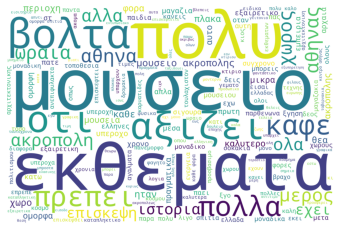

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

#Convert all the required text into a single string here 
#and store them in word_string

#you can specify fonts, stopwords, background color and other options

wordcloud = WordCloud(    stopwords= set(list(nlp.Defaults.stop_words)),
                          background_color='white',
                          width=3000,
                          height=2000
                         ).generate(all)


plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
doc = nlp(all[1])

In [ ]:
for token in doc:
    print(token, token.lemma_)

In [ ]:
' '.join(token.lemma_ for token in doc)

' '

In [ ]:
full_doc = nlp(all)

In [ ]:
clear_text = ' '.join(token.lemma_ for token in full_doc)

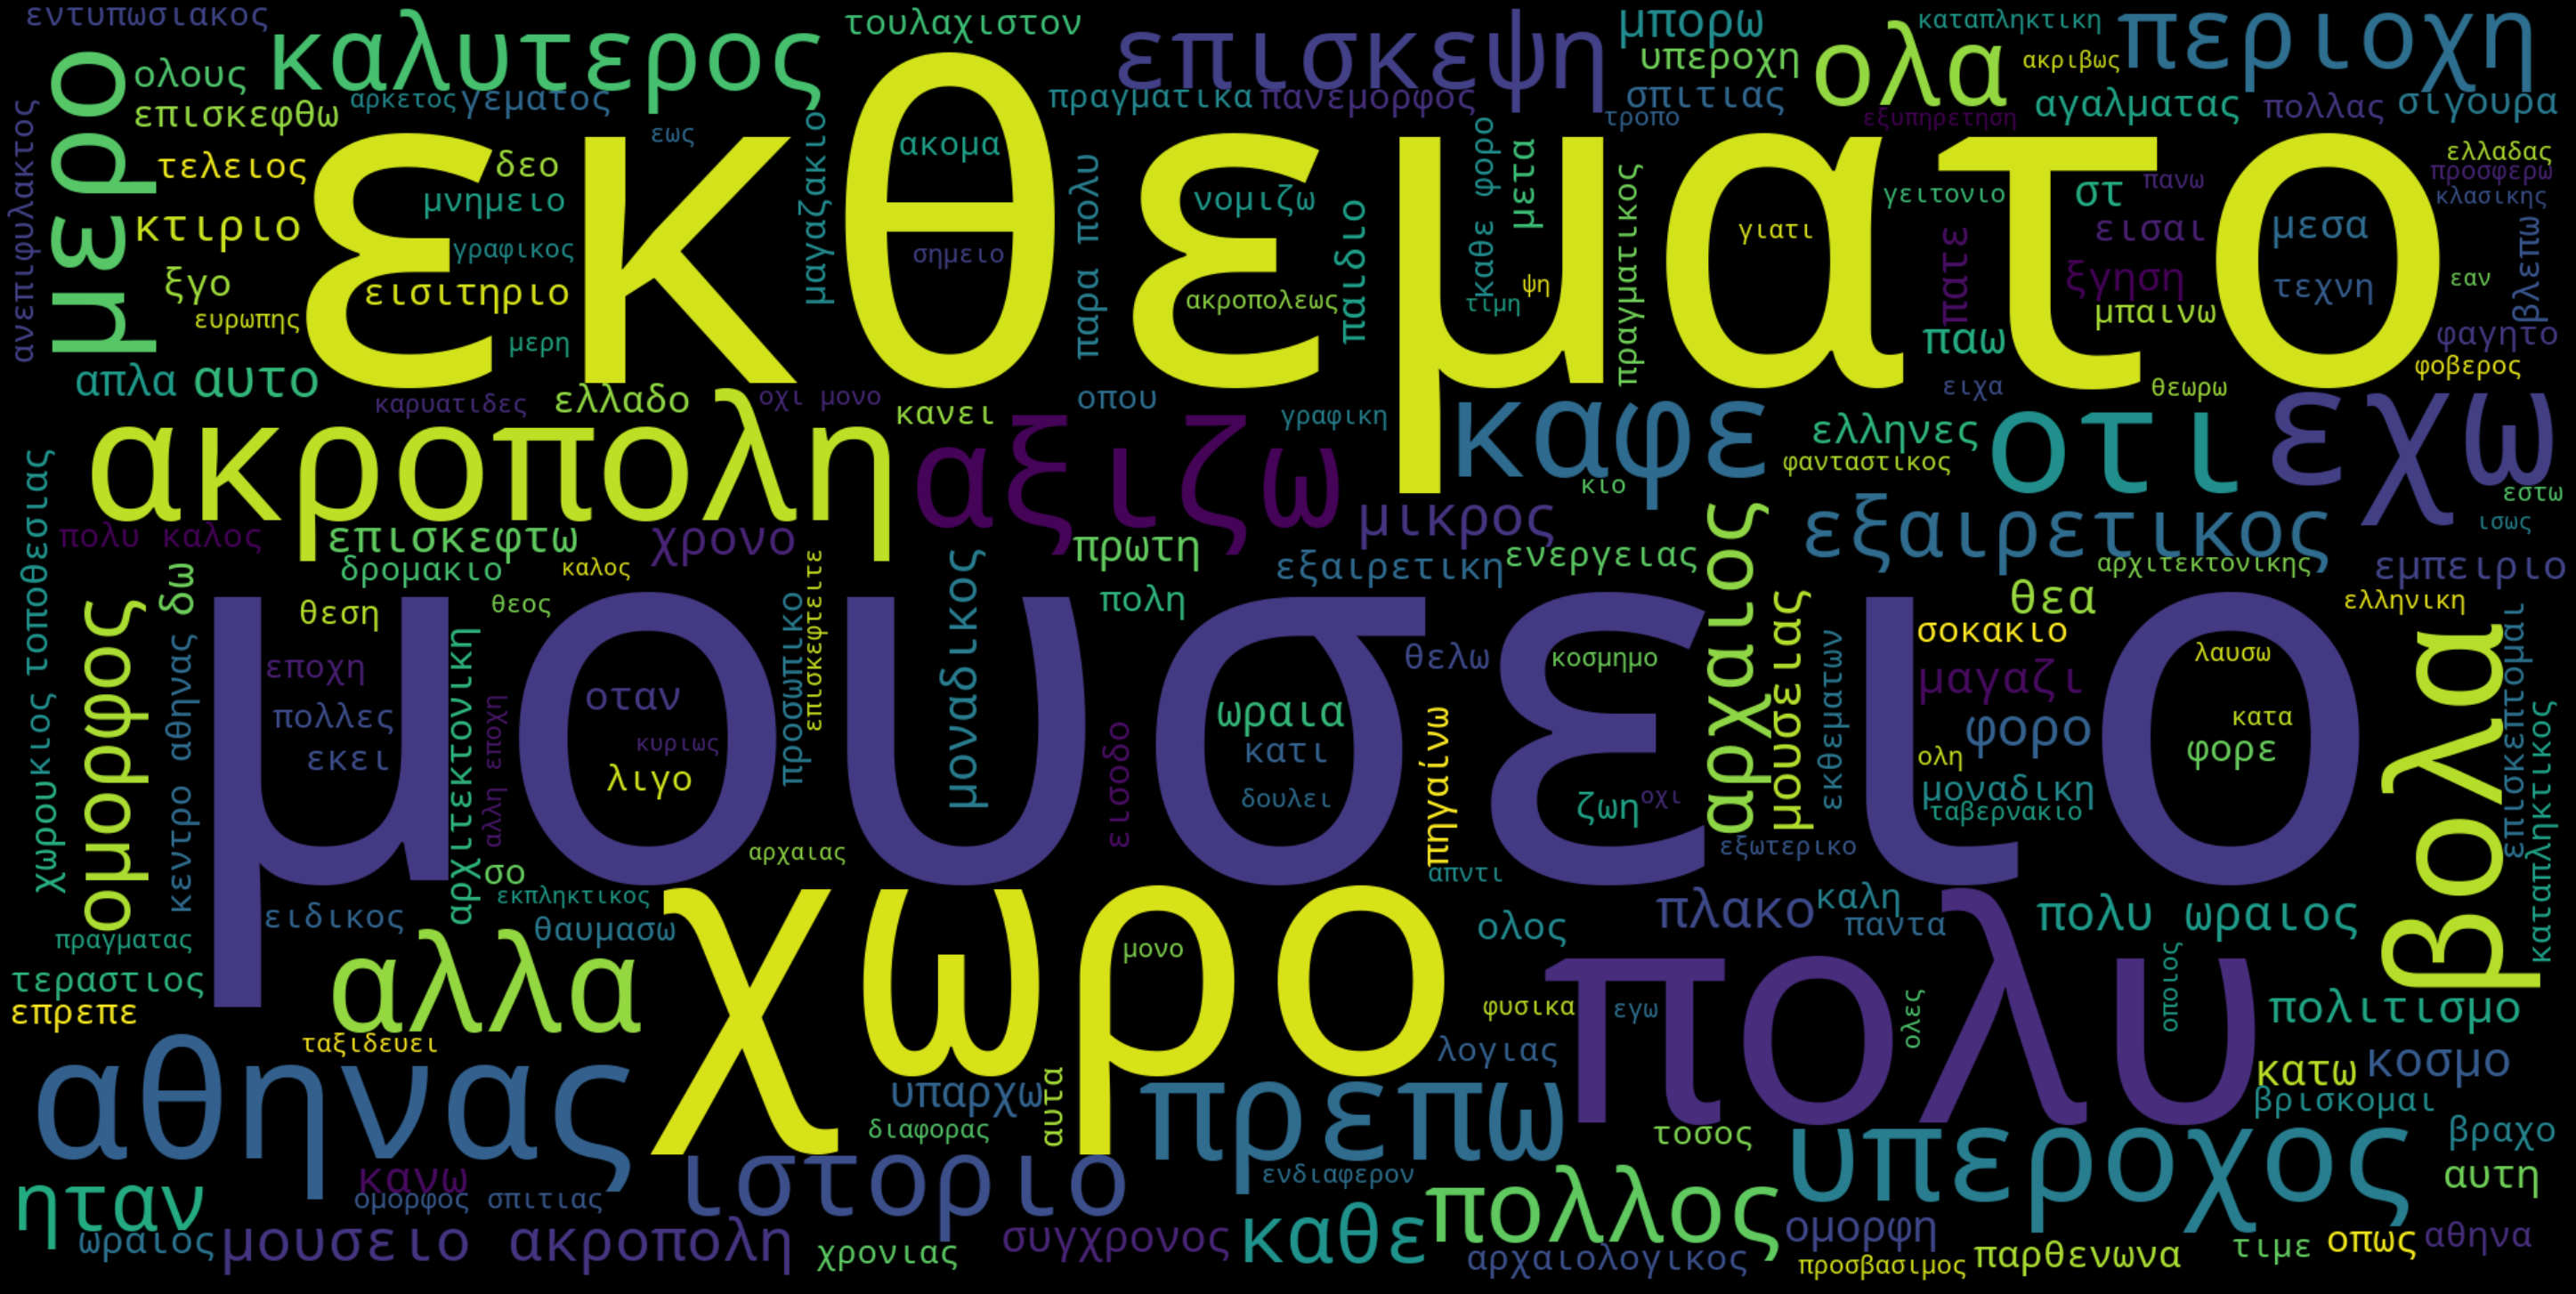

In [ ]:
wordcloud = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    width = 2000,
    height = 1000,
    background_color = 'black'
 ).generate(clear_text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
list(nlp.Defaults.stop_words)[0:20]

['όποιο',
 'τέτοιαν',
 'υπόψιν',
 'δίπλα',
 'καμία',
 'τόσην',
 'είχατε',
 'μόνος',
 'ετούτα',
 'μόνων',
 'ολωσδιόλου',
 'εκείνος',
 'ξαφνικά',
 'ίσαμε',
 'συχνού',
 'μου',
 'όχι',
 'στο',
 'άμεσα',
 'αύριο']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [ ]:
count_vector = cv.fit_transform(df['comment'].values.astype('U'))

In [ ]:
count_vector.shape

(2315, 1825)

In [ ]:
# cv.get_feature_names()

results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 

results.head()


,03,10,100,10ετη,11,2019,2500,3η,3χρονη,50,5η,be,bernard,best,by,cafe,garden,greek,in,kamaki,lego,must,nan,perfect,place,price,restaurant,roof,see,service,stand,the,to,tschumi,vibe,world,άδικα,άθλιου,άκρη,άλλα,...,ψωνισεις,ψώνια,ωρα,ωραία,ωραίο,ωραίος,ωραια,ωραιο,ωραιότατο,ωραιότερα,ωραιότερη,ως,ωστόσο,όλα,όλες,όλη,όλης,όλοι,όλους,όλων,όμορφα,όμορφες,όμορφη,όμορφο,όμορφος,όμως,όποιος,όποτε,όπου,όπως,όροφος,όσο,όσοι,όσους,όταν,ότι,όχι,ώρα,ώρες,ώστε
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
cv = CountVectorizer(stop_words= nlp.Defaults.stop_words, min_df=0.01, max_df=0.95)

In [ ]:
count_vector = cv.fit_transform(df['comment'].values.astype('U'))

In [ ]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 

results.head()

,nan,εκθέματα,μουσείο
0,0,0,0
1,0,0,0
2,0,0,1
3,0,1,1
4,0,1,1


In [ ]:
from html import unescape
def my_tokenizer(doc):
            
    # apply the preprocessing and tokenzation steps
    doc_clean = unescape(doc).lower()
    tokens = nlp(doc_clean)
    lemmatized_tokens = [token.lemma_ for token in tokens if (len(str(token.lemma_))>2)]
            
    # use CountVectorizer's _word_ngrams built in method
    # to remove stop words and extract n-grams
    return(lemmatized_tokens)

In [ ]:
 cv = CountVectorizer(stop_words= nlp.Defaults.stop_words, min_df=0.01, max_df=0.95, tokenizer=my_tokenizer)
 count_vector = cv.fit_transform(df['comment'].values.astype('U'))
 results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
 results.head()


/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['αλλοιώτικος', 'αντίπερο', 'γρήγορο', 'δείνο', 'εαυτός', 'εκάστο', 'ετέρο', 'ιδίος', 'κάνω', 'καθενό', 'μέλλομαι', 'μερικός', 'μπορώ', 'ολόγυρο', 'ορισμένος', 'ποί', 'ποία', 'ποιής', 'πολλός', 'σει', 'στος', 'ταύτο'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


,nan,ακρόπολη,εκθέματο,μουσείο
0,0,0,0,0
1,0,0,0,0
2,0,0,0,1
3,0,0,1,1
4,0,2,1,1


In [ ]:
 cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20 , tokenizer=my_tokenizer)
 count_vector = cv.fit_transform(df['comment'].values.astype('U'))
 results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
 results.head()


/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['αλλοιώτικος', 'αντίπερο', 'γρήγορο', 'δείνο', 'εαυτός', 'εκάστο', 'ετέρο', 'ιδίος', 'κάνω', 'καθενό', 'μέλλομαι', 'μερικός', 'μπορώ', 'ολόγυρο', 'ορισμένος', 'ποί', 'ποία', 'ποιής', 'πολλός', 'σει', 'στος', 'ταύτο'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


,...,nan,αθήνα,αθήνας,ακρόπολη,αξίζω,απο,βόλτα,ειναι,εκθέματο,ιστορία,καφέ,μουσείο,πηγαίνω,υπέροχος,φορά,χώρο,χώρος,ωραίος,όμορφος
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1
4,0,0,0,0,2,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0


In [ ]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, token_pattern = '\\bκυ[α-ωά-ώ]*\\b', tokenizer=my_tokenizer)
count_vector = cv.fit_transform(df['comment'].values.astype('U'))
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['αλλοιώτικος', 'αντίπερο', 'γρήγορο', 'δείνο', 'εαυτός', 'εκάστο', 'ετέρο', 'ιδίος', 'κάνω', 'καθενό', 'μέλλομαι', 'μερικός', 'μπορώ', 'ολόγυρο', 'ορισμένος', 'ποί', 'ποία', 'ποιής', 'πολλός', 'σει', 'στος', 'ταύτο'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


,...,nan,αθήνα,αθήνας,ακρόπολη,αξίζω,απο,βόλτα,ειναι,εκθέματο,ιστορία,καφέ,μουσείο,πηγαίνω,υπέροχος,φορά,χώρο,χώρος,ωραίος,όμορφος
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1
4,0,0,0,0,2,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0


In [ ]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, ngram_range=(2, 2), token_pattern = '\\bκυ[α-ωά-ώ]*\\b', tokenizer= my_tokenizer )
count_vector = cv.fit_transform(df['comment'].values.astype('U'))
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['αλλοιώτικος', 'αντίπερο', 'γρήγορο', 'δείνο', 'εαυτός', 'εκάστο', 'ετέρο', 'ιδίος', 'κάνω', 'καθενό', 'μέλλομαι', 'μερικός', 'μπορώ', 'ολόγυρο', 'ορισμένος', 'ποί', 'ποία', 'ποιής', 'πολλός', 'σει', 'στος', 'ταύτο'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


,αξίζω επισκεφτώ,αξίζω πηγαίνω,βράχο ακρόπολη,βόλτα πλάκα,εξαιρετικό μουσείο,εύκολη πρόσβαση,θέα ακρόπολη,ιερό βράχο,κέντρο αθήνας,καλός δουλειά,καλύτερος μουσείο,καταπληκτικός δουλειά,μοναδικά εκθέματο,μουσείας ευρώπης,μουσείας κόσμο,μουσείο ακρόπολη,μουσείο κόσμημα,πηγαίνω φορά,όμορφος μουσείας,όμορφος σπίτι
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [ ]:
results.sum(axis =0).sort_values(ascending = False)

μουσείο ακρόπολη         14
όμορφος σπίτι             5
βράχο ακρόπολη            5
κέντρο αθήνας             5
εξαιρετικό μουσείο        4
θέα ακρόπολη              4
όμορφος μουσείας          3
αξίζω πηγαίνω             3
εύκολη πρόσβαση           3
ιερό βράχο                3
αξίζω επισκεφτώ           3
καλύτερος μουσείο         3
μοναδικά εκθέματο         3
μουσείας κόσμο            3
μουσείο κόσμημα           3
πηγαίνω φορά              3
καταπληκτικός δουλειά     2
μουσείας ευρώπης          2
βόλτα πλάκα               2
καλός δουλειά             2
dtype: int64

In [ ]:
sum_words =  results.sum(axis =0)
sum_words.sort_values(ascending = False)  

μουσείο ακρόπολη         14
όμορφος σπίτι             5
βράχο ακρόπολη            5
κέντρο αθήνας             5
εξαιρετικό μουσείο        4
θέα ακρόπολη              4
όμορφος μουσείας          3
αξίζω πηγαίνω             3
εύκολη πρόσβαση           3
ιερό βράχο                3
αξίζω επισκεφτώ           3
καλύτερος μουσείο         3
μοναδικά εκθέματο         3
μουσείας κόσμο            3
μουσείο κόσμημα           3
πηγαίνω φορά              3
καταπληκτικός δουλειά     2
μουσείας ευρώπης          2
βόλτα πλάκα               2
καλός δουλειά             2
dtype: int64

In [ ]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, ngram_range=(1, 2)) 
               #      token_pattern = '(\\bκ[οω]ρ[οω]ν[α-ωά-ώ]+\\b') #\| (\\bκυβ[α-ωά-ώ]\\b) , tokenizer=my_tokenizer)
                     #token_pattern = '\\bcov[a-z0-9-_]*\\b') , tokenizer=my_tokenizer)
count_vector = cv.fit_transform(df['comment'].values.astype('U'))
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

,nan,αθήνα,αθήνας,ακρόπολη,ακρόπολης,αξίζει,απο,βόλτα,ειναι,εκθέματα,επίσκεψη,ιστορία,καφέ,μέρος,μουσείο,μουσείο ακρόπολης,περιοχή,χώρος,ωραία,όμορφα
0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
3,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1
4,0,0,0,0,2,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0


In [ ]:
results.sum(axis =0).sort_values(ascending = False)

nan                  2130
μουσείο                61
εκθέματα               42
ακρόπολης              25
αθήνας                 22
βόλτα                  22
αξίζει                 21
χώρος                  19
ειναι                  17
αθήνα                  17
καφέ                   17
ακρόπολη               17
απο                    16
όμορφα                 16
ωραία                  16
μουσείο ακρόπολης      14
επίσκεψη               14
ιστορία                14
μέρος                  14
περιοχή                13
dtype: int64

In [ ]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, #ngram_range=(1, 2), 
                     vocabulary = ['μουσειο', 'αθήνα']) #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(df['comment'].values.astype('U'))
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()


,μουσειο,αθήνα
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf_vectorizer = TfidfVectorizer(stop_words= nlp.Defaults.stop_words, max_features=500)
tfidf_matrix_train = tfidf_vectorizer.fit_transform(df['comment'].values.astype('U'))  #finds the tfidf score with normalization

In [ ]:
results = pd.DataFrame(tfidf_matrix_train.toarray(), columns=tfidf_vectorizer.get_feature_names()) 
results.head()

,100,2500,cafe,must,nan,restaurant,the,άκρη,άνετα,άξιζε,άποψη,άψογη,άψογος,έκλεψαν,έλειπε,έλληνας,έλληνες,έπρεπε,ήθελα,αγάλματα,αθήνα,αθήνας,αθηνα,αθηνας,αθηνών,αισθανεσαι,ακροπολη,ακροπολης,ακροπόλεως,ακρόπολη,ακρόπολης,αλλα,αναμονή,αναφιώτικα,ανεπιφύλακτα,ανοιξε,αντάξιο,αντίτιμο,αξίζει,αξιζει,...,υπέροχο,υπέροχος,υπαρχουν,υπεροχα,υπομονή,φίλους,φαγητο,φαγητό,φανταστικό,φας,φθηνό,φιλοξενεί,φορά,φορές,φορα,φυσικά,φως,φωτεινό,φωτισμός,χάσει,χρόνια,χρόνο,χρώματα,χωρο,χώρα,χώρας,χώρο,χώρος,χώρου,χώρους,ψώνια,ωραία,ωραίο,ωραίος,ωραια,ωραιότερα,όμορφα,όμορφη,όμορφο,ώρα
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.276114,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.268847,0.0,...,0.303823,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.278808,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.432427,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.432427,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.57419,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.209048,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.282682,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.223202,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.434779,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

print("cosine scores ==> ",cosine_similarity(tfidf_matrix_train[0:1], tfidf_matrix_train))

cosine scores ==>  [[1. 0. 0. ... 0. 0. 0.]]


In [ ]:
print("cosine scores ==> ",cosine_similarity(tfidf_matrix_train, tfidf_matrix_train))

cosine scores ==>  [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]]


In [ ]:
arr = cosine_similarity(tfidf_matrix_train, tfidf_matrix_train)

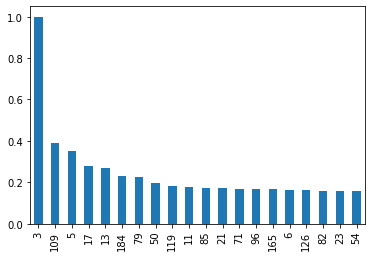

In [ ]:
pd.DataFrame(arr).loc[3].sort_values(ascending = False).head(20).plot(kind = 'bar')

In [ ]:
from google.colab import files

df.to_csv('athcomments.csv')
files.download('athcomments.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>